# AutoML Regression Modelling with PyCaret

In [1]:
import pandas as pd
from pycaret.regression import *
from datetime import datetime, date
%matplotlib inline

#sen1 = pd.read_csv("sentencing_s.csv")
sen2 = pd.read_csv("./sentencing_post_eda.csv")

In [2]:
sen2.shape

(1227930, 47)

In [3]:
sen2 = sen2[sen2.county=="polk"] 

In [4]:
len(sen2)

50404

In [5]:
sen2 = sen2[sen2["statut"].str.startswith("893", na=False)]

In [6]:
len(sen2)

15133

In [7]:
sen2[["age", "totpts", "sp_cj_total_days", "totpts_cut_group"]].describe().apply(lambda s: s.apply('{0:.2f}'.format))

,age,totpts,sp_cj_total_days,totpts_cut_group
count,15133.00,15133.00,15133.00,15133.00
mean,34.39,33.11,271.22,1.16
std,10.51,20.50,548.23,1.67
min,9.00,4.00,0.00,0.00
25%,26.00,19.40,0.00,0.00
50%,33.00,28.60,0.00,1.00
75%,42.00,39.90,366.00,1.00
max,82.00,198.90,10950.00,17.00


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'totpts'}>],
       [<AxesSubplot:title={'center':'sp_cj_total_days'}>,
        <AxesSubplot:title={'center':'totpts_cut_group'}>]], dtype=object)

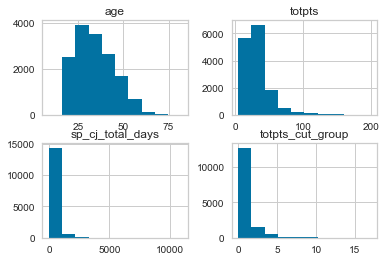

In [8]:
sen2[["age", "totpts", "sp_cj_total_days", "totpts_cut_group"]].hist()

In [9]:
sen2 = sen2[['sp_cj_total_days', 'gender', 'age', 'race', 'circuit', 'totpts_cut_group', 'clfely']]

data = sen2.sample(frac=0.9, random_state=786)
data_unseen = sen2.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (13620, 7)
Unseen Data For Predictions: (1513, 7)


In [10]:
from pycaret.regression import *
X = setup(data = data, target = 'sp_cj_total_days', session_id=123, normalize = True, 
          transformation = True, #transform_target = True
          )

#X = setup(data = data, target = 'sp_cj_total_days', session_id=123, normalize = True, 
#          transformation = True, transform_target = True, 
#          combine_rare_levels = True, rare_level_threshold = 0.05,
#          remove_multicollinearity = True, multicollinearity_threshold = 0.95)

#, categorical_features = ['race', 'gender', 'county', 'judge', 'clfely']           
#['race', 'gender', 'county', 'judge', 'clfely', 'statut', 'offlvl', 'enhanc', 'haboff', 'habvio', 'vcc', 'prrpact', 'prioff', 'lsviol', 'faviol'])
          

,Description,Value
0,session_id,123
1,Target,sp_cj_total_days
2,Original Data,"(13620, 7)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9533, 29)"


In [11]:
best = compare_models(exclude = [])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,168.0391,130011.6154,357.2091,0.5793,3.1045,0.5976,0.0250
huber,Huber Regressor,162.1216,132224.8844,358.8510,0.5773,2.9201,0.6061,0.1240
lasso,Lasso Regression,169.7305,132299.4820,359.3488,0.5758,3.1261,0.6003,0.1840
br,Bayesian Ridge,168.0003,131014.9409,358.7974,0.5750,3.0984,0.5983,0.0210
lar,Least Angle Regression,167.9581,131258.6874,359.1710,0.5739,3.0970,0.5984,0.0200
lightgbm,Light Gradient Boosting Machine,175.8249,134086.8487,362.6495,0.5616,3.1534,0.6021,0.7890
par,Passive Aggressive Regressor,161.6954,140099.0451,369.0680,0.5535,2.7659,0.6265,0.0360
gbr,Gradient Boosting Regressor,175.5729,144715.0640,376.3568,0.5304,3.2490,0.5898,0.0790
knn,K Neighbors Regressor,180.0939,152177.5268,386.8624,0.5056,3.0293,0.6449,0.0420
rf,Random Forest Regressor,179.4268,157859.9796,394.0886,0.4829,3.0846,0.6258,0.1880


In [12]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,158.4490,140432.2479,374.7429,0.5861,3.2223,0.7749
1,171.8704,155953.9437,394.9100,0.5807,3.0738,0.5559
2,171.5386,101569.3973,318.6995,0.5353,3.1003,0.5438
3,165.7179,80142.1878,283.0940,0.6459,3.1727,0.5466
4,173.6781,109610.9424,331.0754,0.5809,3.0042,0.7102
5,167.2002,112380.3895,335.2318,0.5871,3.0945,0.6128
6,154.2999,96238.9968,310.2241,0.6471,3.1445,0.5756
7,176.5697,171161.5923,413.7168,0.5611,3.0970,0.5450
8,164.5448,128933.4227,359.0730,0.5876,2.9630,0.5616
9,176.5222,203693.0339,451.3236,0.4817,3.1729,0.5496


In [13]:
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,159.4211,144189.2836,379.7226,0.5750,3.2394,0.7773
1,172.8771,160477.7518,400.5967,0.5686,3.0947,0.5558
2,172.2577,97638.2628,312.4712,0.5533,3.1193,0.5398
3,165.6911,76065.7183,275.8001,0.6639,3.1898,0.5447
4,173.3988,102314.0317,319.8656,0.6088,3.0242,0.7035
5,166.8051,109033.1020,330.2016,0.5994,3.1161,0.6107
6,155.3558,97768.9292,312.6802,0.6414,3.1605,0.5783
7,177.5707,173925.1932,417.0434,0.5540,3.1134,0.5462
8,165.3415,131516.3070,362.6518,0.5793,2.9815,0.5629
9,176.5183,204582.8059,452.3083,0.4795,3.1925,0.5444


In [14]:
print(tuned_ridge)

Ridge(alpha=4.42, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


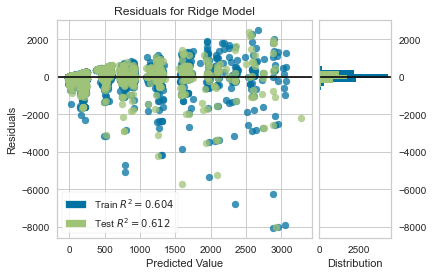

In [15]:
plot_model(tuned_ridge)


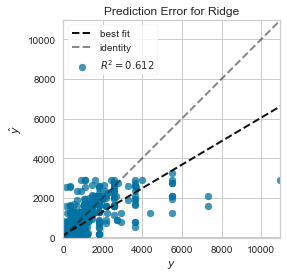

In [16]:
plot_model(tuned_ridge, plot = 'error')


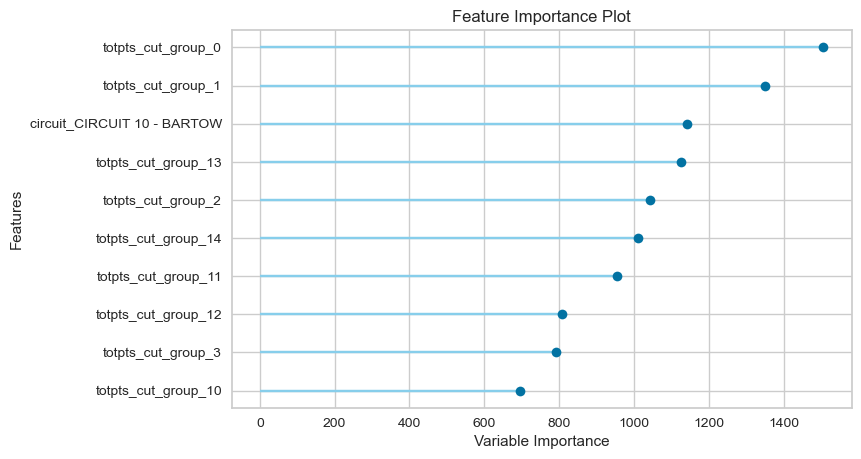

In [17]:
plot_model(tuned_ridge, plot='feature')

In [18]:
predict_model(tuned_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,169.4559,123136.4978,350.9081,0.6117,3.1014,0.5164


In [19]:
final_ridge = finalize_model(tuned_ridge)

In [20]:
print(final_ridge)

Ridge(alpha=4.42, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


In [21]:
predict_model(final_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,168.0507,119562.5608,345.7782,0.6229,3.0853,0.5137


In [22]:
unseen_predictions = predict_model(final_ridge, data=data_unseen)

In [23]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.sp_cj_total_days, unseen_predictions.Label, 'R2')

0.6693

In [24]:
check_metric(unseen_predictions[unseen_predictions.race=="BLACK"].sp_cj_total_days, unseen_predictions[unseen_predictions.race=="BLACK"].Label, 'R2')

0.6592

In [25]:
check_metric(unseen_predictions[unseen_predictions.race=="WHITE"].sp_cj_total_days, unseen_predictions[unseen_predictions.race=="WHITE"].Label, 'R2')

0.6689

In [26]:
unseen_predictions.head(25)

,sp_cj_total_days,gender,age,race,circuit,totpts_cut_group,clfely,Label
0,480,MALE,45,BLACK,CIRCUIT 10 - BARTOW,2,3RD DEGREE,506.961456
1,675,MALE,42,BLACK,CIRCUIT 10 - BARTOW,3,3RD DEGREE,762.639893
2,0,MALE,41,WHITE,CIRCUIT 10 - BARTOW,1,2ND DEGREE,223.844513
3,1095,MALE,32,BLACK,CIRCUIT 10 - BARTOW,3,1ST DEGREE,1112.523193
4,366,FEMALE,27,WHITE,CIRCUIT 10 - BARTOW,1,3RD DEGREE,154.784088
5,1227,MALE,26,WHITE,CIRCUIT 10 - BARTOW,5,1ST DEGREE,1589.630371
6,0,FEMALE,45,WHITE,CIRCUIT 10 - BARTOW,1,3RD DEGREE,163.643402
7,0,FEMALE,31,WHITE,CIRCUIT 10 - BARTOW,0,3RD DEGREE,1.492704
8,2555,MALE,22,WHITE,CIRCUIT 10 - BARTOW,9,1ST DEGREE,2308.353271
9,2700,MALE,41,WHITE,CIRCUIT 10 - BARTOW,4,2ND DEGREE,931.891235


In [94]:
save_model(final_ridge,'Final LightGBM Model (Pin-893) 23Feb2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='sp_cj_total_days',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dummy', Dummify(target='sp_cj_total_days')),
                 ('fix_perfect', Remove_100(target='sp_cj_total_days')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),


In [95]:
get_config('X_train').shape

(26523, 29)

In [96]:
get_config('X_train').dtypes

age                                float32
gender_FEMALE                      float32
race_BLACK                         float32
race_OTHER                         float32
race_WHITE                         float32
circuit_CIRCUIT 06 - CLEARWATER    float32
totpts_cut_group_0                 float32
totpts_cut_group_1                 float32
totpts_cut_group_10                float32
totpts_cut_group_11                float32
totpts_cut_group_12                float32
totpts_cut_group_13                float32
totpts_cut_group_14                float32
totpts_cut_group_15                float32
totpts_cut_group_16                float32
totpts_cut_group_17                float32
totpts_cut_group_2                 float32
totpts_cut_group_3                 float32
totpts_cut_group_4                 float32
totpts_cut_group_5                 float32
totpts_cut_group_6                 float32
totpts_cut_group_7                 float32
totpts_cut_group_8                 float32
totpts_cut_

In [28]:
get_config('y_train')

9645     1020
8068        0
12931       0
5813        0
13253    1460
         ... 
5218       90
12252       0
1346      240
11646     364
3582        0
Name: sp_cj_total_days, Length: 9533, dtype: int64

<AxesSubplot:>

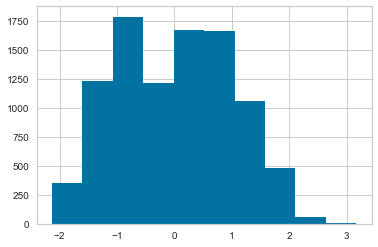

In [27]:
get_config('X_train').age.hist()

In [29]:
unseen_predictions.circuit.unique()

array(['CIRCUIT 10 - BARTOW'], dtype=object)